<a href="https://colab.research.google.com/github/leandrofernandesbatista/Data-Science/blob/main/An%C3%A1lise_explorat%C3%B3ria_dos_Dados_do_Airbnb_na_cidade_de_Lisboa_em_Portugal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="25%" src="https://github.com/leandrofernandesbatista/Data-Science/blob/main/LOGO.png?raw=true">

---

# Análise dos Dados do Airbnb - *Lisboa Portugal*

Atualmente o [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira do mundo**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, vamos analisar os dados referentes à cidade de Lisboa em Portugal, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [4]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline

In [5]:
# importar o arquivo listings.csv para um DataFrame
dados = pd.read_csv('http://data.insideairbnb.com/portugal/lisbon/lisbon/2022-12-16/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id para identificar o imóvel
* `name` - nome do imóvel anunciado
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Nome da cidade
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de avaliações que a propriedade possui
* `last_review` - data da última avaliação
* `reviews_per_month` - quantidade de avaliações por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [6]:
# mostrar as 5 primeiras entradas
dados.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.697500,-9.197680,Entire home/apt,45,3,47,2022-10-07,0.47,1,250,15,NaN
1,25659,Heart of Alfama - Le cœur d'Alfama - Sleeps 3,107347,Ellie,Lisboa,Santa Maria Maior,38.712410,-9.127060,Entire home/apt,60,2,175,2022-12-11,1.66,1,310,48,56539/AL.
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.710820,-9.127190,Entire home/apt,60,5,353,2022-09-05,2.42,1,208,17,23535/AL
3,133645,A pleasure in Lisbon,656138,Juan,Lisboa,Santa Maria Maior,38.710910,-9.132510,Entire home/apt,69,2,348,2022-11-14,2.52,2,161,62,AL/6125
4,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.711560,-9.129870,Entire home/apt,66,2,352,2022-12-04,2.73,1,223,51,28737/AL
5,134438,The Oasis Beautiful outside terrace and garden!,659768,Matt,Lisboa,So Vicente,38.718410,-9.123300,Entire home/apt,120,5,204,2022-11-06,1.48,2,344,5,60792/AL
6,272438,Modern decor in best neighbourhood,1416183,Fadoflats,Lisboa,Santa Maria Maior,38.712910,-9.142340,Entire home/apt,108,3,109,2022-10-24,0.87,11,169,33,3019/AL
7,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.711080,-9.159790,Entire home/apt,1186,2,88,2022-11-20,0.60,2,277,23,55695/AL
8,273835,Challet Joset I Old Fashioned House,1432350,Samantha,Cascais,Carcavelos e Parede,38.692190,-9.358870,Entire home/apt,85,3,31,2022-11-30,0.28,3,169,10,NaN
9,134624,Sea views - 270 degrees,660500,Nuno,Mafra,Ericeira,38.985851,-9.415645,Entire home/apt,80,3,8,2022-09-30,0.06,1,365,7,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [7]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(dados.shape[0]))
print("Variáveis:\t {}\n".format(dados.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(dados.dtypes)

Entradas:	 19690
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(dados.isnull().sum() / dados.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.099492
last_review                       0.099492
license                           0.062925
name                              0.000356
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

In [9]:
dados.isnull().sum().sort_values()

id                                   0
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
minimum_nights                       0
price                                0
number_of_reviews_ltm                0
room_type                            0
latitude                             0
neighbourhood                        0
neighbourhood_group                  0
host_name                            0
host_id                              0
longitude                            0
name                                 7
license                           1239
last_review                       1959
reviews_per_month                 1959
dtype: int64

### **Q3. Qual o tipo de distribuição das variáveis?** 

##### Para identificar a distribuição das variáveis, será plotado histogramas.

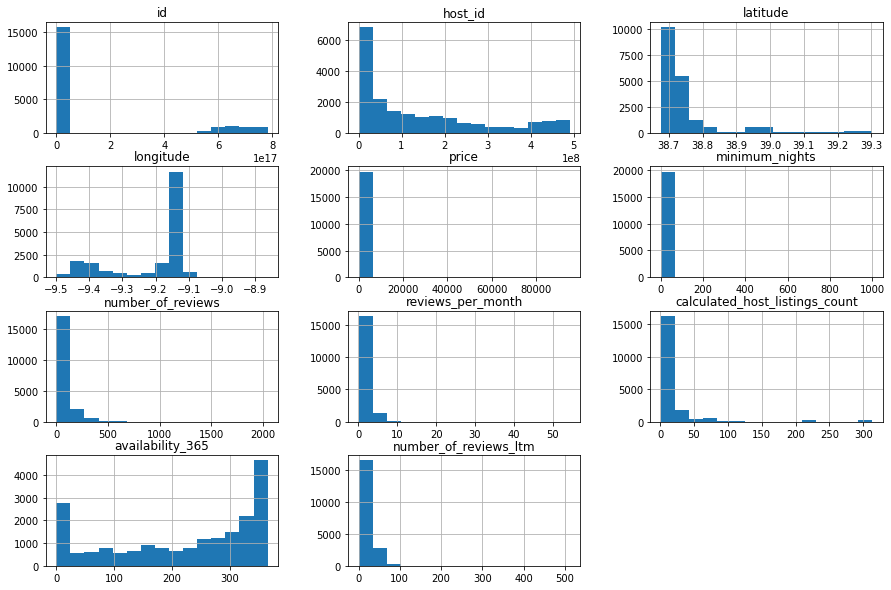

In [31]:
# plotar o histograma das variáveis numéricas
dados.hist(bins=15, figsize=(15,10));

In [10]:
fig = make_subplots(rows=3, cols=3, subplot_titles=("id", "availability_365", "price", "latitude", 'longitude',
                                                    'calculated_host_listings_count', 'minimum_nights', 'number_of_reviews' ,'reviews_per_month'))

fig.add_trace(go.Histogram(x=dados.id, marker_color= '#636EFA', nbinsx =20), row=1,col=1)

fig.add_trace(go.Histogram(x=dados.availability_365, marker_color= '#636EFA', nbinsx =20), row=1,col=2)

fig.add_trace(go.Histogram(x=dados.price, marker_color= '#636EFA', nbinsx =20), row=1,col=3)

fig.add_trace(go.Histogram(x=dados.latitude, marker_color= '#636EFA', nbinsx =20), row=2,col=1)

fig.add_trace(go.Histogram(x=dados.longitude, marker_color= '#636EFA', nbinsx =20), row=2,col=2)

fig.add_trace(go.Histogram(x=dados.calculated_host_listings_count , marker_color= '#636EFA', nbinsx =20), row=2,col=3)

fig.add_trace(go.Histogram(x=dados.minimum_nights, marker_color= '#636EFA', nbinsx =20), row=3,col=1)

fig.add_trace(go.Histogram(x=dados.number_of_reviews, marker_color= '#636EFA', nbinsx =20), row=3,col=2)

fig.add_trace(go.Histogram(x=dados.reviews_per_month, marker_color= '#636EFA', nbinsx =20), row=3,col=3)

fig.update_layout(height=600, width=1000, showlegend=False, title_text="Distribuição de frequência das variáveis")

fig.show()


### **Q4. Existem Outiliers?**

Pela distribuição dos histogramas foi possível verificar de início a presença de outiliers nas variáveis: `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não apresentam uma distribuição e distorcem a representação dos dados. Existem duas maneiras de rápidas para auxiliar na detecção de outliers e são elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.


In [11]:
# ver o resumo estatístico das variáveis numéricas

dados[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19690.000000,19690.000000,19690.000000,17731.000000,19690.000000,19690.000000
mean,140.624073,3.961656,57.732402,1.478231,18.390655,220.121737
std,1164.270441,14.908184,85.472770,1.448817,47.402754,128.000981
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,58.000000,1.000000,5.000000,0.440000,1.000000,106.000000
50%,82.000000,2.000000,23.000000,1.060000,4.000000,260.000000
75%,127.000000,3.000000,73.750000,2.140000,13.000000,338.000000
max,95119.000000,1000.000000,2047.000000,54.430000,313.000000,365.000000


No resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 127 Euros, porém seu valor máximo é 95119 Euros.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

In [12]:
# minimum_nights
fig = go.Figure()
fig.add_trace(go.Box(x=dados.minimum_nights, name=" minimum_nighs"))
fig.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(dados[dados.minimum_nights > 30])))
print("{:.4f}%".format((len(dados[dados.minimum_nights > 30]) / dados.shape[0])*100))


minimum_nights: valores acima de 30:
254 entradas
1.2900%


#### Boxplot para Price

In [13]:
# minimum_nights
fig = go.Figure()
fig.add_trace(go.Box(x=dados.price, name=" price"))
fig.show()

# ver quantidade de valores acima de 750 euros para cada noite
print("price: valores acima de 750 Euros:")
print("{} entradas".format(len(dados[dados.price > 750])))
print("{:.4f}%".format((len(dados[dados.price > 750]) / dados.shape[0])*100))

price: valores acima de 750 Euros:
198 entradas
1.0056%


#### Histogramas sem *outliers*

Depois de identificarmos os  *outliers* nas variáveis `price` e `minimum_nights`,  será necessário agora limpar o *DataFrame* delas e plotar novamente o histograma.

In [14]:
# remover os *outliers* em um novo DataFrame

dados_limpos = dados.copy()
dados_limpos.drop(dados_limpos[dados_limpos.price > 750].index, axis=0, inplace=True)
dados_limpos.drop(dados_limpos[dados_limpos.minimum_nights > 30].index, axis=0, inplace=True)

In [15]:
# plotar o histograma para as variáveis numéricas

fig = make_subplots(rows=3, cols=3, subplot_titles=("id", "availability_365", "price", "latitude", 'longitude',
                                                    'calculated_host_listings_count', 'minimum_nights', 'number_of_reviews' ,'reviews_per_month'))

fig.add_trace(go.Histogram(x=dados_limpos.id, marker_color= '#636EFA', nbinsx =20), row=1,col=1)

fig.add_trace(go.Histogram(x=dados_limpos.availability_365, marker_color= '#636EFA', nbinsx =20), row=1,col=2)

fig.add_trace(go.Histogram(x=dados_limpos.price, marker_color= '#636EFA', nbinsx =20), row=1,col=3)

fig.add_trace(go.Histogram(x=dados_limpos.latitude, marker_color= '#636EFA', nbinsx =20), row=2,col=1)

fig.add_trace(go.Histogram(x=dados_limpos.longitude, marker_color= '#636EFA', nbinsx =20), row=2,col=2)

fig.add_trace(go.Histogram(x=dados_limpos.calculated_host_listings_count , marker_color= '#636EFA', nbinsx =20), row=2,col=3)

fig.add_trace(go.Histogram(x=dados_limpos.minimum_nights, marker_color= '#636EFA', nbinsx =20), row=3,col=1)

fig.add_trace(go.Histogram(x=dados_limpos.number_of_reviews, marker_color= '#636EFA', nbinsx =20), row=3,col=2)

fig.add_trace(go.Histogram(x=dados_limpos.reviews_per_month, marker_color= '#636EFA', nbinsx =20), row=3,col=3)

fig.update_layout(height=600, width=1000, showlegend=False, title_text="Distribuição de frequência das variáveis sem outliers")

fig.show()

### **Q4. Qual a média dos preços de aluguel?**

In [16]:
# ver a média da coluna `price``
print('O preço médio do aluguel é:',dados_limpos.price.mean().round(2))

O preço médio do aluguel é: 106.78


### **Q4. Qual a correlação existente entre as variáveis**

In [17]:
# criar uma matriz de correlação
corr = dados_limpos[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr().round(3)

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000,-0.001,-0.117,-0.144,-0.007,0.061
minimum_nights,-0.001,1.000,-0.094,-0.165,-0.075,-0.080
number_of_reviews,-0.117,-0.094,1.000,0.612,-0.089,-0.007
reviews_per_month,-0.144,-0.165,0.612,1.000,-0.049,0.092
calculated_host_listings_count,-0.007,-0.075,-0.089,-0.049,1.000,0.056
availability_365,0.061,-0.080,-0.007,0.092,0.056,1.000


In [18]:
# plotar um heatmap a partir das correlações
fig = px.imshow(corr, color_continuous_scale ='RdYlBu',text_auto=True)
fig.show()

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica qual o tipo de locação que está anunciada no Airbnb. No site existem opções de apartamentos/casas inteiras, aluguel de um quarto somente ou mesmo quartos compartilhados.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [19]:
# mostrar a quantidade de cada tipo de imóvel disponível

dados_limpos.room_type.value_counts()

Entire home/apt    14751
Private room        4053
Hotel room           223
Shared room          213
Name: room_type, dtype: int64

In [20]:
# mostrar a porcentagem de cada tipo de imóvel disponível
dados_limpos.room_type.value_counts() / dados_limpos.shape[0] * 100

Entire home/apt    76.668399
Private room       21.065489
Hotel room          1.159044
Shared room         1.107069
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara na cidade de Portugal?**

É possível verificar uma variável em função da outra com o comando `groupby()`. No caso, comparar os bairros (*neighbourhoods*) a partir do preço de locação.


In [25]:
# ver preços por bairros, na média
dados_limpos.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Alguber                                            630.000000
Aveiras de Baixo                                   367.000000
Cardosas                                           353.000000
Enxara do Bispo, Gradil e Vila Franca do Rosrio    241.538462
Ribamar                                            238.500000
Santa Brbara                                       191.647059
Vermelha                                           187.666667
Alhandra, So Joo dos Montes e Calhandriz           187.125000
Azambuja                                           179.000000
Colares                                            177.128065
Name: price, dtype: float64

In [22]:
# plotar os imóveis pela latitude-longitude
df = px.data.iris()
fig = px.scatter(dados_limpos, x="longitude", y="latitude", color='price')
fig.show()

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [23]:
# ver a média da coluna `minimum_nights``

print('A quantidade média de mínima de noites é:', int(dados_limpos.minimum_nights.mean()))

A quantidade média de mínima de noites é: 3


## Conclusões


Após uma análise superficial na base de dados do Airbnb foi possível perceber a presença de outliers em algumas variáveis.

Foi possível perceber que os valores também se comportam a valores de cidades mais ricas na Europa, pois Portugal vem sofrendo com a alta dos preços nas locações devido a alta demanda.

Por último, vale lembrar que este é um dataset resumido dos dados, mas que já é possível tirar alguns insights utilizando ele. Para uma análise exploratória mais complexa recomenda-se o uso do conjunto de dados completo com mais de 106 variáveis disponíveis.

